### 最简单的AI例子，一元一次函数 y = ax + b 的回归计算

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

#### 数据准备

In [2]:
x_data = np.linspace(-1, 1, 10, dtype=np.float)
print(x_data)
y_data = np.dot(2.5, x_data) + 0.5 + np.random.randn(10) / 5
print(y_data)

[-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
  0.33333333  0.55555556  0.77777778  1.        ]
[-2.17025279 -1.03932182 -0.88859948 -0.53007941  0.68616605  0.86240646
  1.67856212  2.01787485  2.25369263  2.70425747]


#### 模型准备

In [3]:
# 模型准备
# 偏移量
b = tf.Variable(tf.zeros([1]) + 0.1)
# 权重（斜率）
w = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
# 目标函数
y = tf.multiply(w, x_data) + b
# 损失函数
loss = tf.reduce_mean(tf.square(y - y_data))
# 优化器
optimizer = tf.train.AdamOptimizer(0.001)
train = optimizer.minimize(loss)

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
init = tf.global_variables_initializer()

In [5]:
with tf.Session() as sess:
    sess.run(init)
    for step in range(0, 10000):
        sess.run(train)
        if step % 1000 == 0:
            print(sess.run(w), sess.run(b), sess.run(loss))
    y_data_new = sess.run(y)

[0.85559875] [0.101] 1.2534794
[1.697486] [0.55018926] 0.26970127
[2.1971128] [0.5574685] 0.08250744
[2.380025] [0.55746925] 0.064858325
[2.406181] [0.5574698] 0.064562395
[2.4069717] [0.55747014] 0.06456211
[2.4069781] [0.5574703] 0.06456212
[2.4069822] [0.5574705] 0.06456212
[2.4069846] [0.55747056] 0.06456212
[2.406986] [0.5574706] 0.064562105


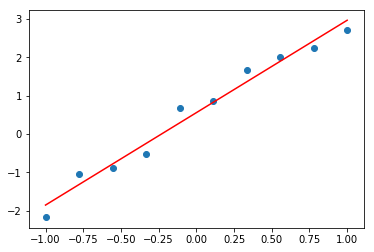

In [6]:
plt.scatter(x_data, y_data)
plt.plot(x_data, y_data_new, color='red')
plt.show()